In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.interpolate import Rbf

from code.featurize import featurizer, bin_interpolate
from code.makedbs import get_db

In [4]:
f = featurizer()

# Walkscore: standard

In [3]:
f.add_features(['walkscore'])

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


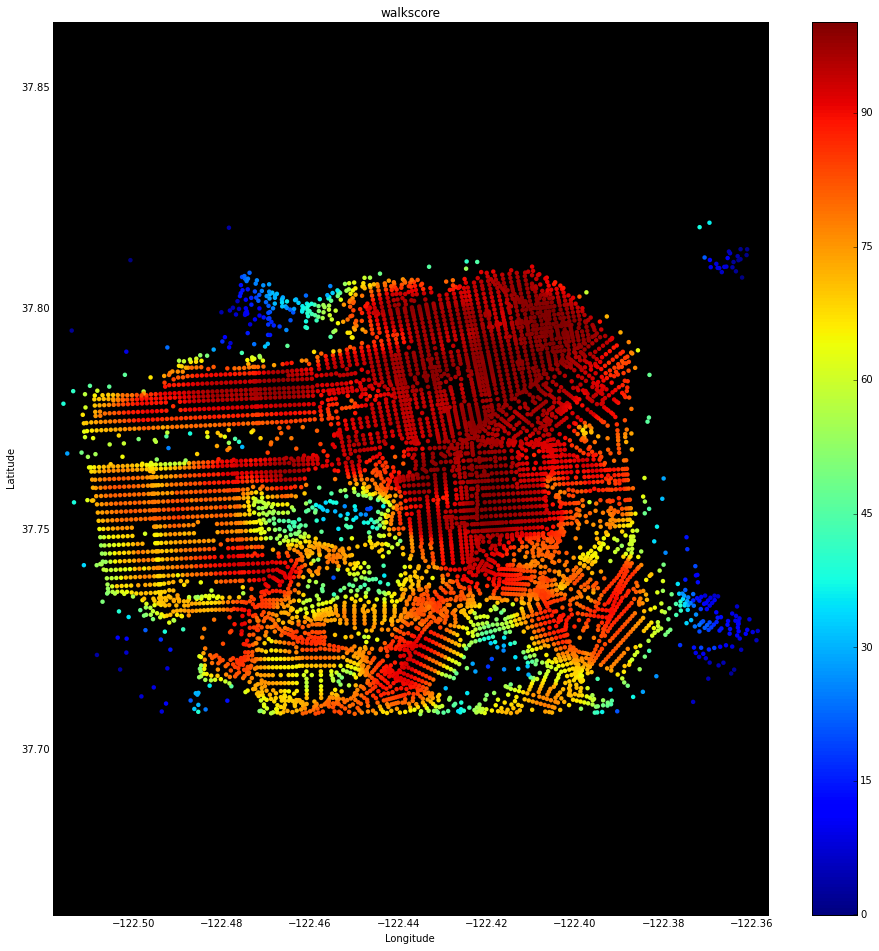

In [4]:
f.plot(['walkscore'])

# population

In [6]:
f.add_features(['usc_pop'])

In [7]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.population,
          function='linear', smooth=1)
f.features['popsmooth'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.1 s, sys: 4.22 s, total: 28.4 s
Wall time: 15.4 s


/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


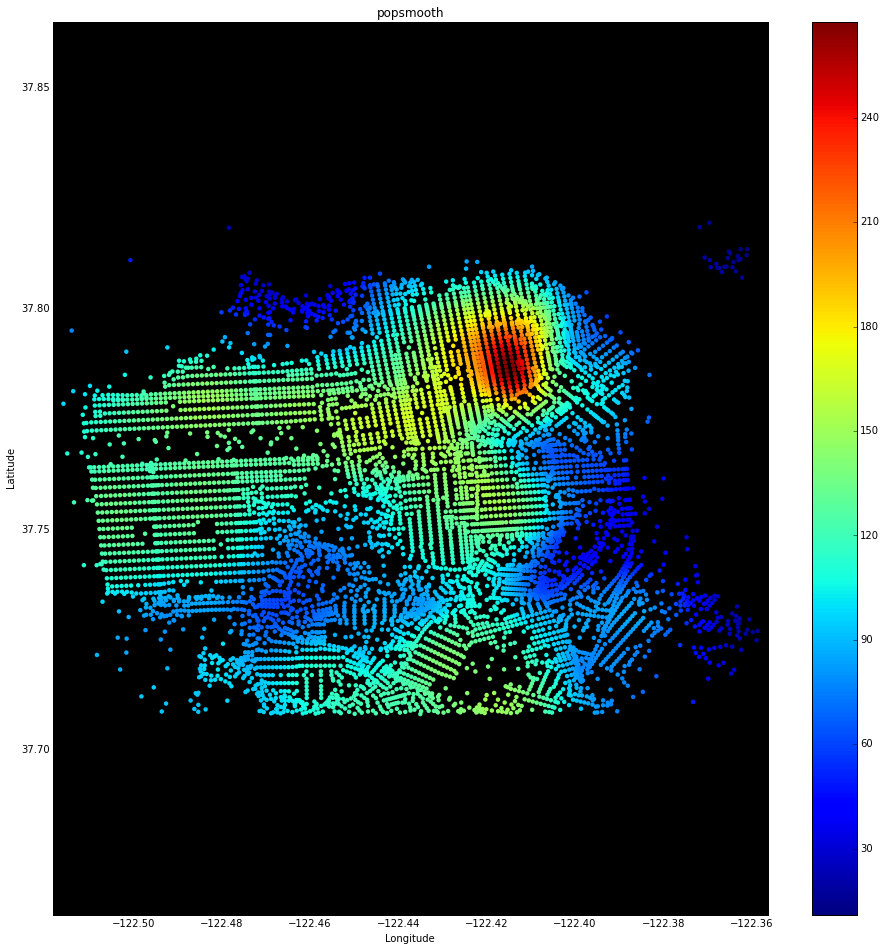

In [8]:
f.plot(['popsmooth'])

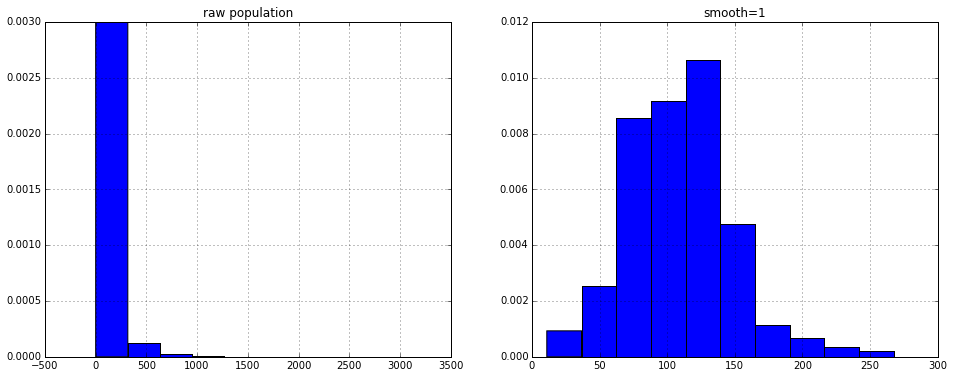

In [36]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.population.hist(normed=True)
plt.title('raw population')
plt.subplot(122)
f.features.popsmooth.hist(normed=True)
plt.title('smooth=1');


# household

In [24]:
f.add_features(['usc_household'])

In [28]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.avg_hh_size,
          function='linear', smooth=.1)
f.features['housesmooth'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.3 s, sys: 5.45 s, total: 29.7 s
Wall time: 18.5 s


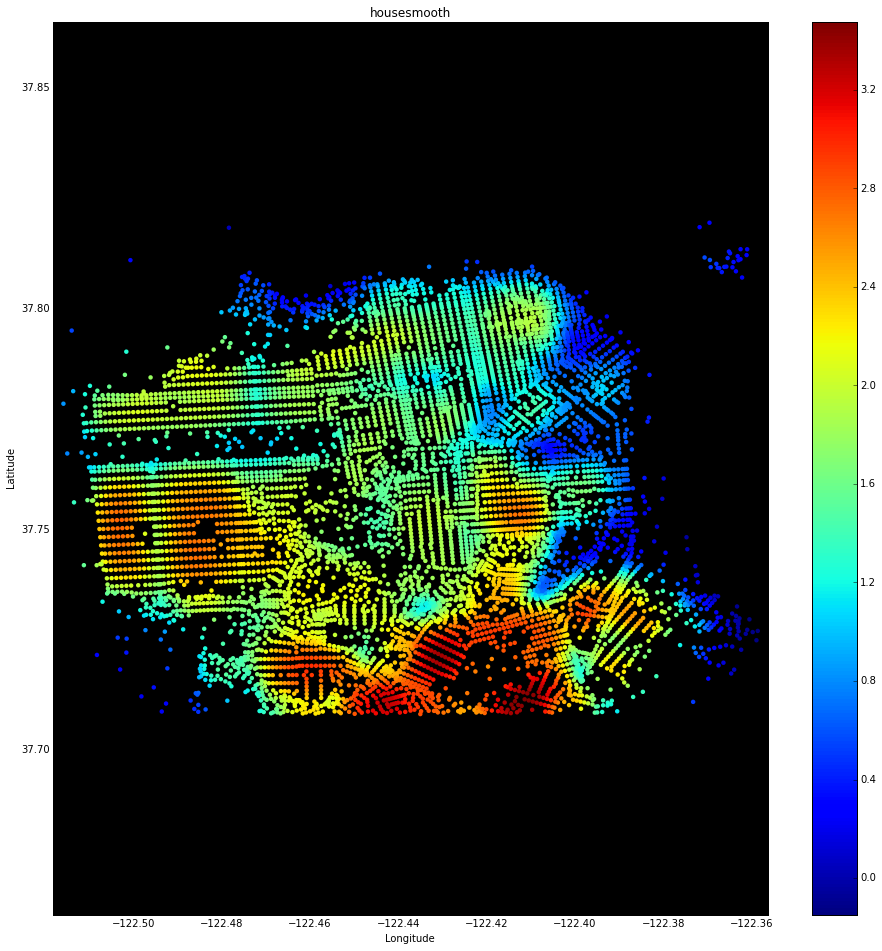

In [29]:
f.plot(['housesmooth'])

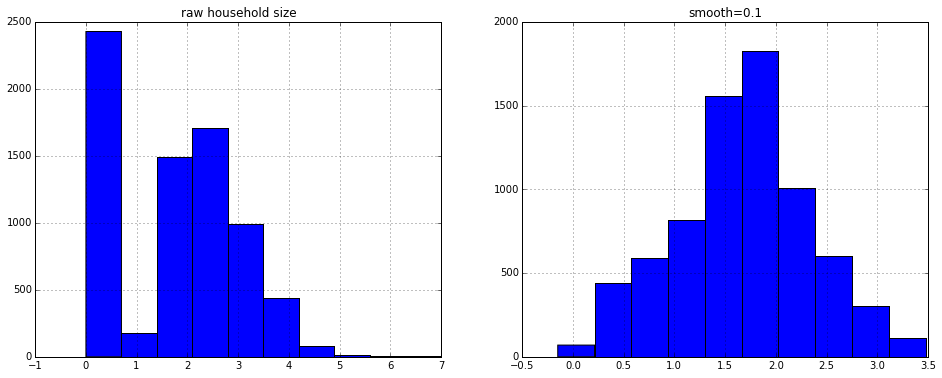

In [37]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.avg_hh_size.hist()
plt.title('raw household size')
plt.subplot(122)
f.features.housesmooth.hist()
plt.title('smooth=0.1');

# Gender

In [38]:
f.add_features(['usc_age_gender'])

In [58]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.sgnf * f.features.popsmooth,
          function='linear', smooth=0.01)
f.features['sgnfs'] = rbf(f.features.lon, f.features.lat)

CPU times: user 25.3 s, sys: 6.82 s, total: 32.1 s
Wall time: 21.4 s


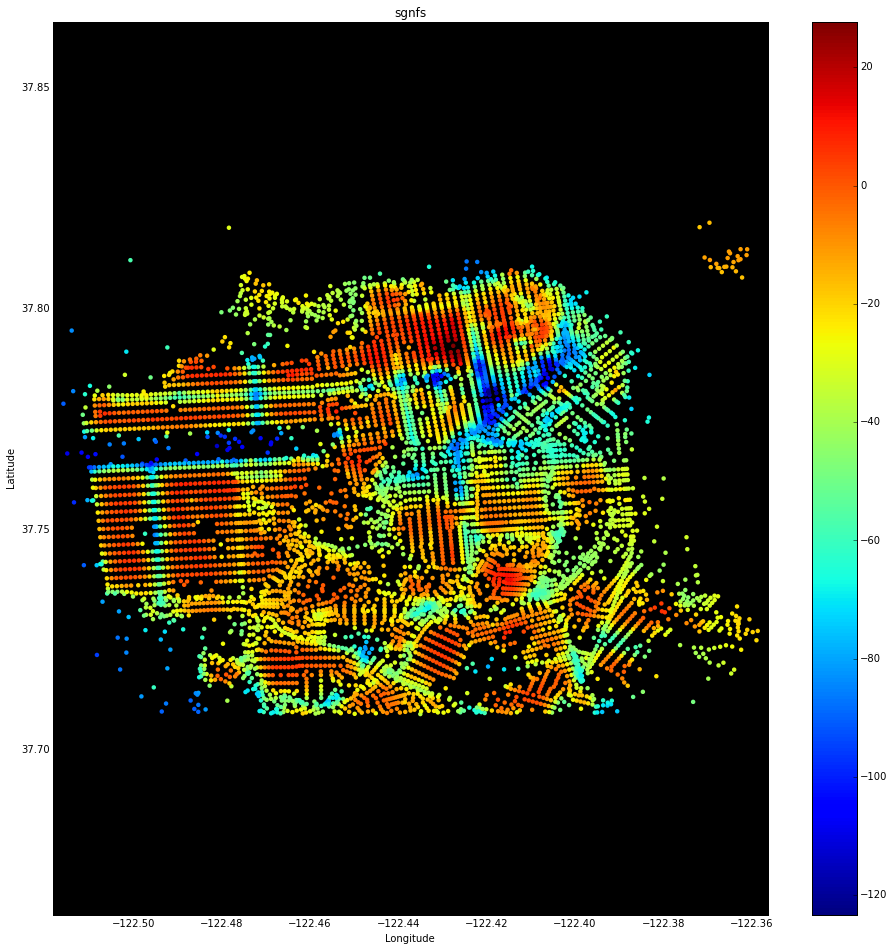

In [59]:
f.plot(['sgnfs'])

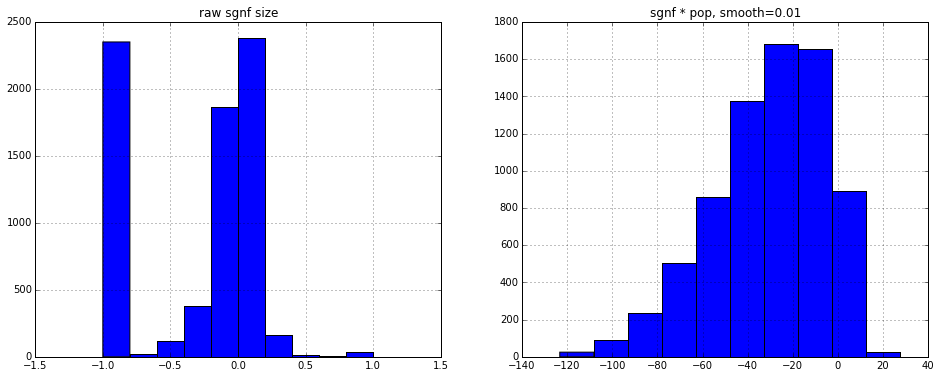

In [60]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.sgnf.hist()
plt.title('raw sgnf size')
plt.subplot(122)
f.features.sgnfs.hist()
plt.title('sgnf * pop, smooth=0.01');

In [62]:
hhdb = get_db('usc_age_gender')
hhdb.head()

,block,block_group,tract,id2,total,m,m_u5,m_5_9,m_10_14,m_15_17,...,f_50_54,f_55_59,f_60_61,f_62_64,f_65_66,f_67_69,f_70_74,f_75_79,f_80_84,f_85_over
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101,1,1001,60750101001001,44,31,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,1,1004,60750101001004,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
hhdb[['total', 'm', 'f']].sum(axis=0)

total    805235
m        408462
f        396773
dtype: int64

In [64]:
f.features.sgnfs.sum()

-224595.31715989305

# Crime

In [5]:
f.add_features(['sfpd'])

In [6]:
f.add_features(['usc_pop'])

In [27]:
df = (f.features.ncrimes / (f.features.population + 1))
df.describe()

count     7334.000000
mean       113.648571
std        428.114300
min       -193.555495
25%          0.863281
50%          2.650173
75%         71.523837
max      10197.878732
dtype: float64

In [19]:
%%time
rbf = Rbf(f.features.lon, f.features.lat, f.features.ncrimes,
          function='linear', smooth=0.1)
f.features['ncrimessm'] = rbf(f.features.lon, f.features.lat)

CPU times: user 24.1 s, sys: 5.7 s, total: 29.8 s
Wall time: 20.7 s


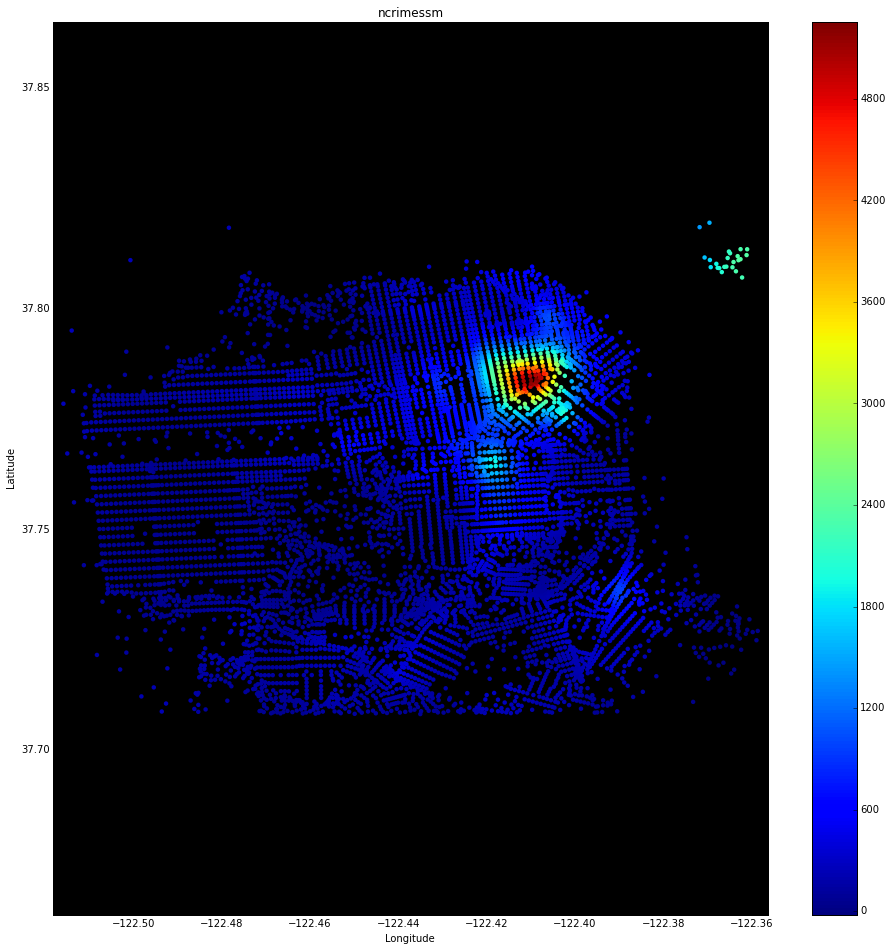

In [20]:
f.plot(['ncrimessm'])

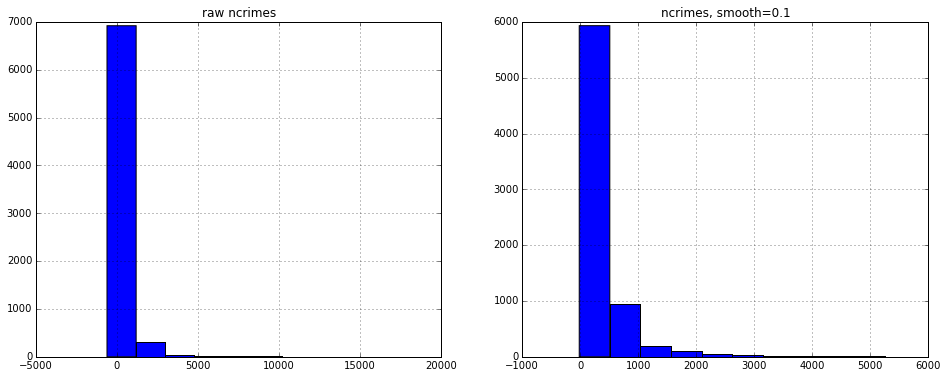

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.ncrimes.hist()
plt.title('raw ncrimes')
plt.subplot(122)
f.features.ncrimessm.hist()
plt.title('ncrimes, smooth=0.1');

# retail

In [23]:
f.add_features(['business'])

In [38]:
rbf = Rbf(f.features.lon, f.features.lat, f.features.retail,
          function='linear', smooth=0.3)
f.features['retailsm'] = rbf(f.features.lon, f.features.lat)

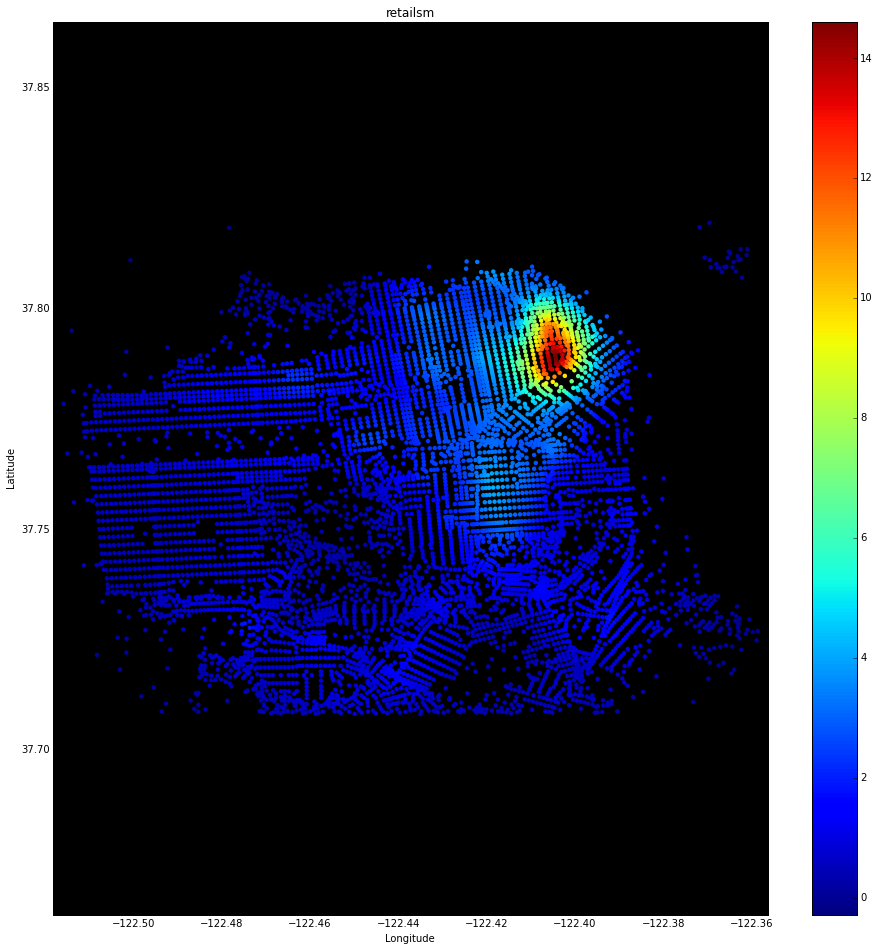

In [39]:
f.plot(['retailsm'])

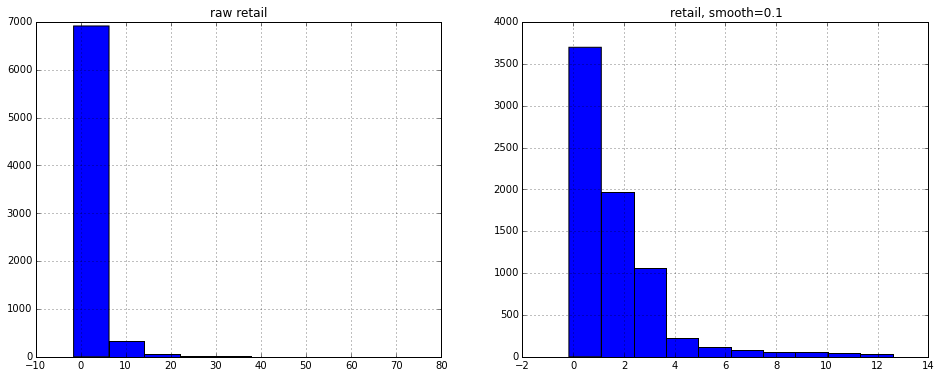

In [35]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
f.features.retail.hist()
plt.title('raw retail')
plt.subplot(122)
f.features.retailsm.hist()
plt.title('retail, smooth=0.1');

# Results

* Walkscore: 0 smooth
* Population: 1 smooth
* Household size: 0.1 smooth
* Gender: * population, 0.01 smooth
* Crime: 0.1 smooth
* retail: 0.3 smooth
